In [17]:
import jupyter_fix

jupyter_fix.fix_jupyter_path()

In [18]:
import numpy as np
import pandas as pd

kuzushiji = np.load("data/kuzushiji-49/k49-train-imgs.npz")
kuzushiji_labels = np.load("data/kuzushiji-49/k49-train-labels.npz")
kuzushiji_csv = pd.read_csv("data/kuzushiji-49/k49_classmap.csv", index_col=0)

In [19]:
hieroglyphs = kuzushiji['arr_0']
labels = kuzushiji_labels['arr_0']

In [20]:
hieroglyphs_32 = np.empty(shape=(len(hieroglyphs), 32, 32))

for hieroglyph in range(len(hieroglyphs)):
    hieroglyphs_32[hieroglyph] = np.pad(hieroglyphs[hieroglyph], 2, mode='constant')

In [21]:
kuzushiji_csv

character_mapping = dict()
character_mapping_inverted = dict()

kuzushiji_ndarray = kuzushiji_csv.to_numpy()

for idx in range(len(kuzushiji_ndarray)):
    character_mapping[idx] = kuzushiji_ndarray[idx]

ま


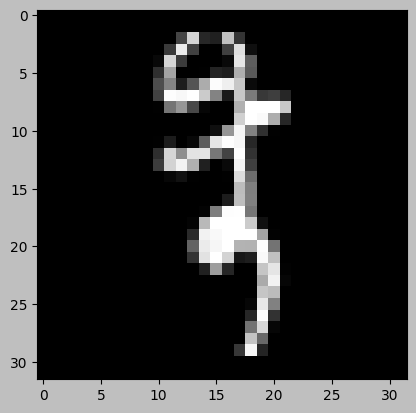

In [22]:
import matplotlib.pyplot as plt

character = 0

plt.style.use('grayscale')

plt.imshow(hieroglyphs_32[character])
print(kuzushiji_csv.iloc[labels[character]].char)

In [23]:
print(kuzushiji_csv.index.to_list())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [24]:
kuzushiji_list = kuzushiji_csv['char'].to_list()
kuzushiji_indices = kuzushiji_csv.index.to_list()

# remove repetition hiragana symbol
kuzushiji_list.remove(kuzushiji_list[-1])
kuzushiji_indices.remove(kuzushiji_indices[-1])

In [25]:
character_dict = dict()

for index in kuzushiji_indices:
    character_dict[index] = hieroglyphs_32[np.where(labels == index)]
    print(kuzushiji_csv.iloc[index].char, " loaded as number " + str(index))

あ  loaded as number 0
い  loaded as number 1
う  loaded as number 2
え  loaded as number 3
お  loaded as number 4
か  loaded as number 5
き  loaded as number 6
く  loaded as number 7
け  loaded as number 8
こ  loaded as number 9
さ  loaded as number 10
し  loaded as number 11
す  loaded as number 12
せ  loaded as number 13
そ  loaded as number 14
た  loaded as number 15
ち  loaded as number 16
つ  loaded as number 17
て  loaded as number 18
と  loaded as number 19
な  loaded as number 20
に  loaded as number 21
ぬ  loaded as number 22
ね  loaded as number 23
の  loaded as number 24
は  loaded as number 25
ひ  loaded as number 26
ふ  loaded as number 27
へ  loaded as number 28
ほ  loaded as number 29
ま  loaded as number 30
み  loaded as number 31
む  loaded as number 32
め  loaded as number 33
も  loaded as number 34
や  loaded as number 35
ゆ  loaded as number 36
よ  loaded as number 37
ら  loaded as number 38
り  loaded as number 39
る  loaded as number 40
れ  loaded as number 41
ろ  loaded as number 42
わ  loaded as number 4

In [26]:
len(kuzushiji_list)

48

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])


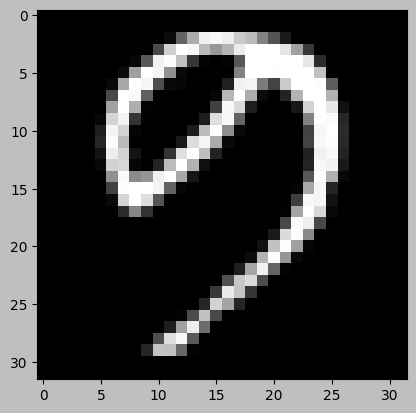

In [27]:
print(character_dict.keys())
plt.imshow(character_dict[24][2])
plt.show()

In [28]:
character_dict[0]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

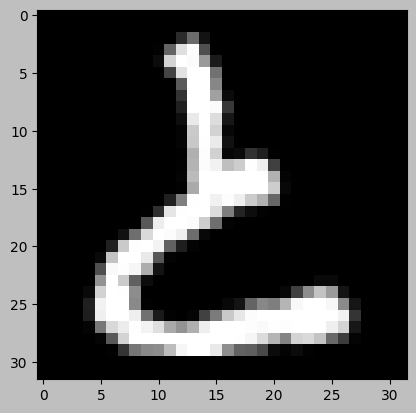

In [29]:
plt.imshow(hieroglyphs_32[1])
plt.show()

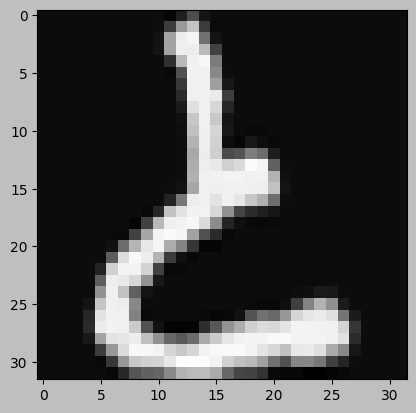

In [30]:
from src.utility import letter_operations

plt.imshow(letter_operations.stretch(hieroglyphs_32[1], 1.15, 1))
plt.show()

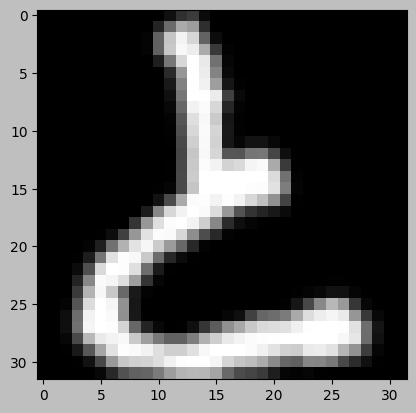

In [31]:
plt.imshow(letter_operations.stretch_cv2(hieroglyphs_32[1], 1.15, 2))
plt.show()

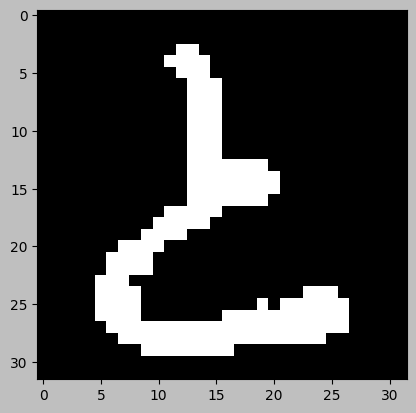

In [32]:
plt.imshow(letter_operations.thresholding(hieroglyphs_32[1], 128))
plt.show()

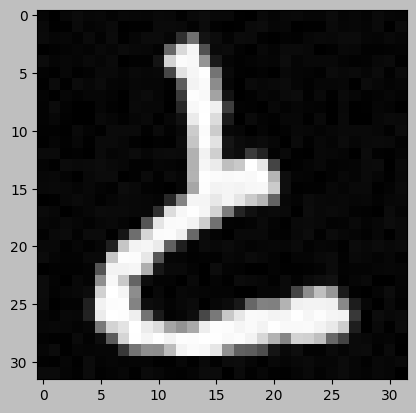

In [33]:
noised = letter_operations.noise(hieroglyphs_32[1], 0.05)
plt.imshow(noised)
plt.show()
# noised

In [34]:
noised

array([[ 6.06343995,  0.94564578,  7.35901365, ..., 10.59942146,
         6.65354745,  5.85155289],
       [ 9.81790069,  1.47020327,  1.55411129, ..., 10.54132286,
         0.93873771, 12.01778109],
       [11.06129787,  6.74918189,  7.76523502, ...,  6.23552491,
         9.78209367,  6.91832822],
       ...,
       [ 6.7289629 , 11.6871396 ,  1.49931247, ...,  2.36093205,
        11.08914346,  0.42701558],
       [ 2.89505067,  1.47073493,  7.17136872, ...,  8.45471074,
         7.28489587, 10.23176719],
       [10.65238058, 10.6740128 ,  5.99227971, ...,  8.90044332,
         7.2980172 ,  0.47243868]])

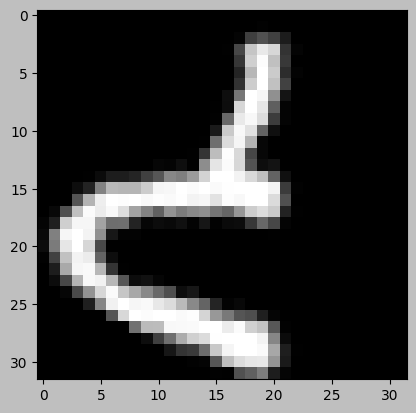

In [35]:
plt.imshow(letter_operations.rotate_cv2(hieroglyphs_32[1], -30))
plt.show()

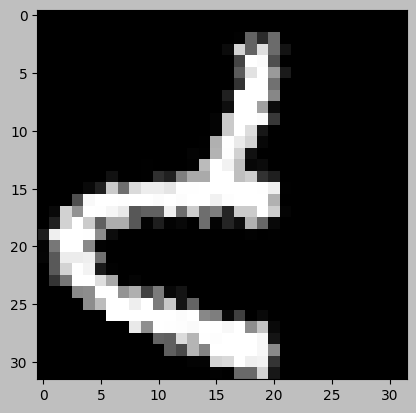

In [36]:
plt.imshow(letter_operations.rotate(hieroglyphs_32[1], -30))
plt.show()